In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw09.ipynb")

/home/codespace/.local/lib/python3.12/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


# Homework 9: Sample Sizes and Confidence Intervals

**Helpful Resource:**

- [Python Reference](http://data8.org/sp24/reference/): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [Estimation](https://inferentialthinking.com/chapters/13/Estimation.html)
* [Why the Mean Matters](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)

In [3]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Bounding the Tail of a Distribution

A community has an average age of 45 years with a standard deviation of 5 years. **We do not know how the ages are distributed.**

In each part below, fill in the blank with a percent that makes the statement true **without further assumptions**, and **explain your answer**.

*Note:* No credit will be given for loose bounds such as "at least 0%" or "at most 100%". Give the best answer that is possible with the information given.

> ***Please review [Section 14.2](https://inferentialthinking.com/chapters/14/2/Variability.html) of the textbook before proceeding with this section. You will be able to understand and solve the problems more efficiently!***

<!-- BEGIN QUESTION -->

**Question 1.1.** At least _______% of the people are between 25 and 65 years old.


93.75

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.2.** At most _______% of the people have ages that are not in the range 25 years to 65 years.


6.25

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.3.** At most _______% of the people are more than 65 years old.

*Hint:* If you're stuck, try thinking about what the distribution may look like in this case.


6.25

<!-- END QUESTION -->

## 2. Sample Size and Confidence Level

A data science class at the large Data 8 University wants to estimate the percent of Facebook users among students at the school. To do this, they need to take a random sample of students. You can assume that their method of sampling is equivalent to drawing at random with replacement from students at the school.

> ***Please review [Section 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) of the textbook before proceeding with this section. There is a helpful formula that will help you solve the problems!***

**Question 2.1.** Assign `smallest` to the smallest number of students they should sample to ensure that a **95%** confidence interval for the parameter has a width of no more than 6% from left end to right end.

*Hint:* How can our data be represented to show if a student in the sample is a Facebook user? Given this, what assumptions can we make for the SD of the population? [Section 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) might be helpful!

*Note:* While the true smallest sample size would have to be an integer, please leave your answer in decimal format for the sake of our tests.


In [4]:
smallest = (4*(0.5/0.06))**2
smallest

1111.1111111111113

In [5]:
grader.check("q2_1")

q2_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.2.** Suppose the data science class decides to construct a 90% confidence interval instead of a 95% confidence interval, but they still require that the width of the interval is no more than 6% from left end to right end. Will they need the same sample size as in 2.1? Pick the right answer and explain further without calculation.

1. Yes, they must use the same sample size.
2. No, a smaller sample size will work.
3. No, they will need a bigger sample.


No, they will need a bigger sample since it would be bigger than 6% on each end as the graph gets "stretched out". 

<!-- END QUESTION -->

**Question 2.3.** The professor tells the class that a 90% confidence interval for the parameter is constructed exactly like a 95% confidence interval, except that you have to go only **1.65 SDs** on either side of the estimate (±1.65) instead of **2 SDs** on either side (±2). Assign `smallest_num` to the smallest number of students they should sample to ensure that a **90%** confidence interval for the parameter has a **width of no more than 6%** from left end to right end.

*Note:* While the true smallest sample size would have to be an integer, please leave your answer in decimal format for the sake of our tests.


In [6]:
smallest_num = (3.3*(0.5/0.06))**2
smallest_num

756.25

In [7]:
grader.check("q2_3")

q2_3 results: All test cases passed!

For this next exercise, please consult [Section 14.3.4](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html#the-standard-normal-cdf) of the textbook for similar examples.

Dhruv and Rahul are curious about how the professor came up with the value 1.65 in Question 2.3. The professor says she ran the following two code cells. The first one calls the `datascience` library function `plot_normal_cdf`, which displays the proportion that is at most the specified number of SDs above average under the normal curve plotted with standard units on the horizontal axis. You can find the documentation [here](http://data8.org/datascience/util.html#datascience.util.plot_normal_cdf).

*Note:* The acronym `cdf` stands for `cumulative distribution function`. It measures the proportion to the left of a specified point under a probability histogram.

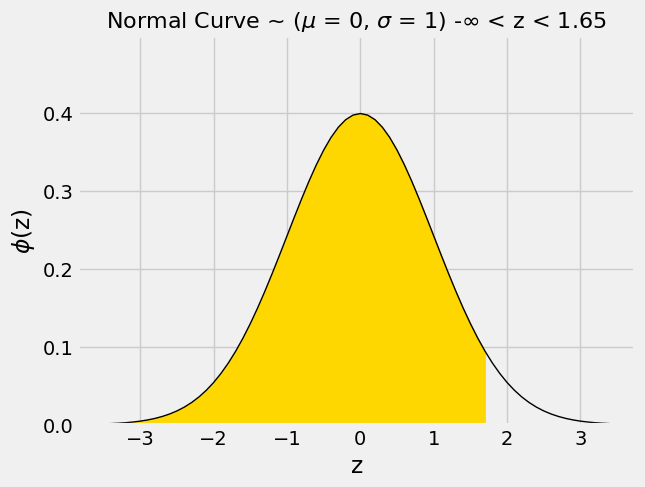

In [8]:
plot_normal_cdf(1.65)

To run the second cell, the professor had to first import a Python library for probability and statistics:

In [9]:
# Just run this cell
from scipy import stats

Then she used the `norm.cdf` method in the library to find the gold proportion above.

In [10]:
# Just run this cell
stats.norm.cdf(1.65)

0.9505285319663519

This means that roughly 95% of our data lies to the left of +1.65 SDs from the mean (the shaded area in yellow above).

*Note*: You do not need to understand how the `scipy` library or how to use the method yourself.

<!-- BEGIN QUESTION -->

**Question 2.4.** This shows that the percentage in a normal distribution that is at most 1.65 SDs above average is about **95%**. Explain why 1.65 is the right number of SDs to use when constructing a **90%** confidence interval. **(6 Points)**


Because this is showing that its missing 5%, so for the other side, you would take 95-5, which is 90.

<!-- END QUESTION -->



In [11]:
# Just run this cell, do not change it.
stats.norm.cdf(2.33)

0.99009692444083575

**Question 2.5.** The cell above shows that the proportion that is at most 2.33 SDs above average in a normal distribution is 99%. Assign `option` to the right option to fill in the blank:

If you start at the estimate and go 2.33 SDs on either side, then you will get a _______% confidence interval for the parameter.

1. 99.5
2. 99
3. 98.5
4. 98

_Note:_ `option` should be assigned to one of `1`, `2`, `3`, or `4` depending on which answer is correct. 



In [12]:
option = 4
option

4

In [13]:
grader.check("q2_5")

q2_5 results: All test cases passed!

## 3. Polling and the Normal Distribution

Michelle is a statistical consultant, and she works for a group that supports Proposition 68 (which would mandate labeling of all horizontal and vertical axes, unrelated to any real California proposition) called Yes on 68.  They want to know how many Californians will vote for the proposition.

Michelle polls a random sample of all California voters, and she finds that 210 of the 400 sampled voters will vote in favor of the proposition. We have provided a table for you below which has 3 columns: the first two columns are identical to `sample`. The third column contains the proportion of total voters that chose each option.

In [14]:
sample = Table().with_columns(
    "Vote",  make_array("Yes", "No"),
    "Count", make_array(210,   190))

sample_size = sum(sample.column("Count"))
sample_with_proportions = sample.with_column("Proportion", sample.column("Count") / sample_size)
sample_with_proportions

Vote,Count,Proportion
Yes,210,0.525
No,190,0.475


**Question 3.1.** Michelle wants to use 10,000 bootstrap resamples to compute a confidence interval for the proportion of all California voters who will vote Yes.  

Fill in the next cell to simulate an empirical distribution of Yes proportions. Use bootstrap resampling to simulate 10,000 election outcomes, and assign `resample_yes_proportions` to contain the Yes proportion of each bootstrap resample. Then, visualize `resample_yes_proportions` with a histogram. **You should see a bell shaped histogram centered near the proportion of Yes in the original sample.**

*Hint:* `sample_proportions` may be useful here!


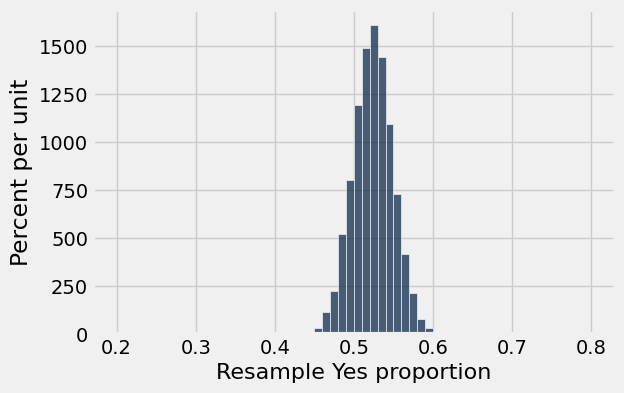

In [15]:
resample_yes_proportions = make_array()
for i in np.arange(10000):
    resample = sample_proportions(400,sample_with_proportions.column("Proportion"))[0]
    resample_yes_proportions = np.append(resample_yes_proportions,resample)
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))

In [16]:
grader.check("q3_1")

q3_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.2.** Why does the Central Limit Theorem (CLT) apply in this situation, and how does it explain the distribution we see above? We recommend reviewing [14.4](https://inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html) for a refresher on CLT.


The CLT says that the probability distribution is roughly normal of a large random sample drawn with replacement. sample_proportions is a random sample drawn with replacement, and doing it 10000 times is large enough.

<!-- END QUESTION -->

In a population whose members are 0 and 1, there is a simple formula for the **standard deviation of that population**:

$$\text{standard deviation of population} = \sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})}$$

(Figuring out this formula, starting from the definition of the standard deviation, is an fun exercise for those who enjoy algebra.)

**Question 3.3.** Using only the Central Limit Theorem and the numbers of Yes and No voters in our sample of 400, *algebraically* compute the predicted standard deviation of the `resample_yes_proportions` array. Assign this number to `approximate_sd`. **Do not access the data in `resample_yes_proportions` in any way.**

Remember that the standard deviation of the sample means can be computed from the population SD and the size of the sample (the formula above might be helpful). If we do not know the population SD, we can use the sample SD as a reasonable approximation in its place. [This section](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html#the-sd-of-all-the-sample-means) of the textbook also may be helpful.


In [17]:
approx_pop_sd = np.sqrt((0.525)*(0.475))
approx_pop_sd
approximate_sd = approx_pop_sd/np.sqrt(400)
approximate_sd

0.024968730444297725

In [18]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Compute the standard deviation of the array `resample_yes_proportions`, which will act as an approximation to the true SD of the possible sample proportions. This will help verify whether your answer to question 3.3 is approximately correct.


In [19]:
exact_sd = np.std(resample_yes_proportions)
exact_sd

0.024997759638365598

In [20]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** **Again, without accessing `resample_yes_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of Yes voters in California.

The cell below draws your interval as a red bar below the histogram of `resample_yes_proportions`; use that to verify that your answer looks right.

*Hint:* How many SDs corresponds to 95% of the distribution promised by the CLT? Recall the discussion in the textbook [here](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html).

*Hint:* The `approximate_sd` variable you previously defined may be helpful!


In [21]:
lower_limit = 0.525-(2*approximate_sd)
upper_limit = 0.525+(2*approximate_sd)
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 0.475062539111 upper: 0.574937460889


In [22]:
grader.check("q3_5")

q3_5 results: All test cases passed!

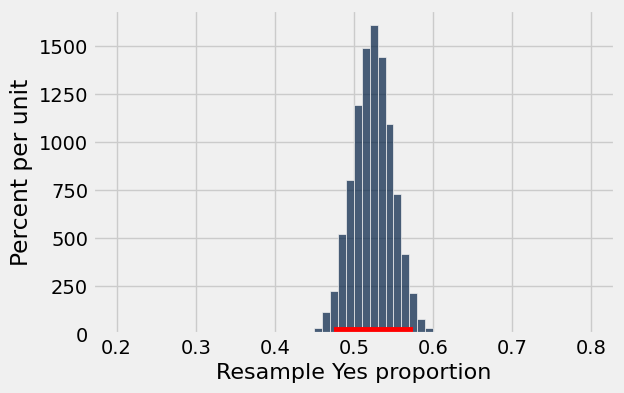

In [23]:
# Run this cell to plot your confidence interval.
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))
plt.plot(make_array(lower_limit, upper_limit), make_array(0, 0), c='r', lw=10);

Your confidence interval should overlap the number 0.5.  That means we can't be very sure whether Proposition 68 is winning, even though the sample Yes proportion is a bit above 0.5.

The Yes on 68 campaign really needs to know whether they're winning.  It's impossible to be absolutely sure without polling the whole population, but they'd be okay if the standard deviation of the sample mean were only 0.005.  They ask Michelle to run a new poll with a sample size that's large enough to achieve that.  (Polling is expensive, so the sample also shouldn't be bigger than necessary.)

Michelle consults Chapter 14 of the textbook.  Instead of making the conservative assumption that the population standard deviation is 0.5 (coding Yes voters as 1 and No voters as 0), she decides to assume that it's equal to the standard deviation of the sample,

$$\sqrt{(\text{Yes proportion in the sample}) \times (\text{No proportion in the sample})}.$$

**Under that assumption, Michelle decides that a sample of 9,975 would suffice.**

Does Michelle's sample size achieve the desired standard deviation of sample means? What SD would you achieve with a smaller sample size? A higher sample size?

**Question 3.6.** To explore this, first compute the SD of sample means obtained by using Michelle's sample size and assign it to `michelle_sample_mean_sd`.


In [24]:
estimated_population_sd = approx_pop_sd
michelle_sample_size = 9975
michelle_sample_mean_sd = estimated_population_sd/np.sqrt(michelle_sample_size)
print("With Michelle's sample size, you would predict a sample mean SD of %f." % michelle_sample_mean_sd)
mlowerbound=0.525-(2*michelle_sample_mean_sd)
mlowerbound

With Michelle's sample size, you would predict a sample mean SD of 0.005000.


0.51500000000000001

In [25]:
grader.check("q3_6")

q3_6 results: All test cases passed!

**Question 3.7.** Next, compute the SD of sample means that you would get from a smaller sample size. Ideally, you should pick a number that is significantly smaller, but any sample size smaller than Michelle's will do.


In [26]:
smaller_sample_size = 100
smaller_sample_mean_sd = estimated_population_sd/np.sqrt(smaller_sample_size)
print("With this smaller sample size, you would predict a sample mean SD of %f" % smaller_sample_mean_sd)
smlowerbound=0.525-(2*smaller_sample_mean_sd)
smlowerbound

With this smaller sample size, you would predict a sample mean SD of 0.049937


0.42512507822280909

In [27]:
grader.check("q3_7")

q3_7 results: All test cases passed!

**Question 3.8.** Finally, compute the SD of sample means that you would get from a larger sample size. Here, a number that is significantly larger would make any difference more obvious, but any sample size larger than Michelle's will do.



In [28]:
larger_sample_size = 100000
larger_sample_mean_sd = estimated_population_sd/np.sqrt(larger_sample_size)
print("With this larger sample size, you would predict a sample mean SD of %f" % larger_sample_mean_sd)
lmlowerbound=0.525-(2*larger_sample_mean_sd)
lmlowerbound

With this larger sample size, you would predict a sample mean SD of 0.001579


0.52184167766052925

In [29]:
grader.check("q3_8")

q3_8 results: All test cases passed!

**Question 3.9.** Based off of this, was Michelle's sample size approximately the minimum sufficient sample, given her assumption that the sample SD is the same as the population SD? Assign `min_sufficient` to `True` if 9,975 was indeed approximately the minimum sufficient sample, and `False` if it wasn't.


In [42]:
ans= (estimated_population_sd/((0.525-0.5)/2))**2
ans
min_sufficient = False 
np.round(ans),min_sufficient

(1596.0, False)

In [39]:
grader.check("q3_9")

q3_9 results: All test cases passed!